In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import random
import math
from PIL import Image

from skimage.io import imread, imshow
from skimage import data
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

from skimage.metrics import structural_similarity


In [2]:
def getMatrix(width,height,I,img):
    i=0
    j=0
    while i<height:
        while j<width:
            #print('i=',i)
            #print('j=',j)
            I[i,j]=img.getpixel((j,i))[0]
            j+=1
        j=0
        i+=1

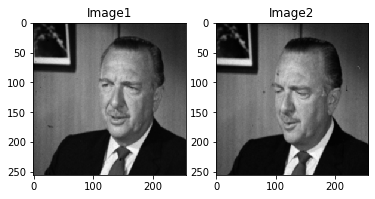

Image size(height*width) for image 1 :  256 * 256
Image size(height*width) for image 2:  256 * 256
Matrix PXL of Image1 :
 [[15 13 12 ... 29 32 36]
 [20 18 16 ... 38 38 41]
 [23 21 18 ... 39 40 40]
 ...
 [73 73 75 ... 19 16 16]
 [75 74 75 ... 17 15 14]
 [76 76 76 ... 15 13 12]]

Matrix PXL of Image2 :
 [[12 11 11 ... 28 32 32]
 [15 14 14 ... 35 38 38]
 [18 17 15 ... 37 38 38]
 ...
 [76 74 74 ... 18 17 17]
 [75 74 74 ... 18 17 18]
 [74 75 75 ... 18 18 18]]


In [3]:
img1=Image.open(r'C:\Users\Biswarup Mistry\Downloads\6.1.01.tiff')
img2=Image.open(r'C:\Users\Biswarup Mistry\Downloads\6.1.14.tiff') #the grayscale 3 touple image

plt.subplot(1,2,1)
plt.imshow(img1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('Image1')
plt.subplot(1,2,2)
plt.imshow(img2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('Image2')
plt.show()


size1=width1, height1= img1.size
size2=width2, height2= img2.size
#print(img1.size)
#print(img2.size)
print('Image size(height*width) for image 1 : ',height1,'*',width1)
#img2=rgb2gray(img2)
print('Image size(height*width) for image 2: ',height2,'*',width2)


#img1=rgb2gray(img1)
#img2=rgb2gray(img2)


#I1=np.matrix(np.arange(height1*width1).reshape(height1, width1))
#getMatrix(width1,height1,I1,img1)
#I2=np.matrix(np.arange(height2*width2).reshape(height2, width2))
#getMatrix(width2,height2,I2,img2)


#---Or---


I1 =list(img1.getdata())
I1 = np.matrix(I1).reshape(height1,width1)
I2 =list(img2.getdata())
I2 = np.matrix(I2).reshape(height2,width2)

print('Matrix PXL of Image1 :\n',I1)
#imshow(I1, cmap='magma')

print('\nMatrix PXL of Image2 :\n',I2)
#imshow(I2, cmap='plasma')

In [4]:
x=[]
y=[]
i=0
while i<height1:
    j=0
    while j<width1 :
        x.append(I1[i,j])
        j+=1
    i+=1

i=0
while i<height2:
    j=0
    while j<width2 :
        y.append(I2[i,j])
        j+=1
    i+=1
    
    
c1=np.square(0.01*255.0) #regulization constants
c2=np.square(0.03*255.0)
c3=c2/2
alpha=beta=gamma=1 #default for exponents

In [5]:
def l(x,y) :
    return (2*np.mean(x)*np.mean(y) +c1)/(np.square(np.mean(x))+np.square(np.mean(y))+c1)

In [6]:
def c(x,y) :
    return (2*np.std(x)*np.std(y) +c2)/(np.square(np.std(x))+np.square(np.std(y))+c2)

In [7]:
def xcov(x,y) :
    xcov = (x * y).mean() - x.mean() * y.mean()
    return xcov

In [8]:
def s(x,y) :
    return (xcov(x,y)+c3)/(np.std(x)*np.std(y)+c3)

In [9]:
def ssim1(x,y) :
    return (pow(l(x,y),alpha))*(pow(c(x,y),beta))*(pow(s(x,y),gamma))

In [10]:
print('SSIM : ',ssim1(I1,I2)) #should come 0.9627..., normally done

SSIM :  708.0745148169154


In [13]:
cov1 = np.mean(I1 * I2) #- np.mean(I1) * np.mean(I2)
print(cov1)

2056219.9976654053
